In [2]:
using PyPlot,JLD2,Statistics
using PyCall
np = pyimport("numpy")
rc("font",family="sans-serif")

In [145]:
function corner(x,y,nbins)
  function scatter_hist(x, y, ax, ax_histx, ax_histy)
    # no labels
    ax_histx.tick_params(axis="x", labelbottom= false )
    ax_histy.tick_params(axis="y", labelleft=false)
    # the scatter plot:
#     ax.scatter(x, y,alpha=.2,marker=".",color="grey")
#     h,xedges,yedges=ax.hist2d(x,y,bins=nbins,cmin=1,cmax=100000)
    h,xedges,yedges=np.histogram2d(x,y,nbins)
    # the contour:
    # xedges=h[2][2:end];yedges=h[3][2:end];
    c=ax.contour(xedges[1:end-1],yedges[1:end-1],h,cmap="RdBu_r",normalize=true)
#     fig.colorbar(c, ax=ax)
    # now determine nice limits by hand:
    # binwidth = 0.25
    # xymax = maximum(maximum(abs.(x)), maximum(abs.(y)))
    # lim = (int(xymax/binwidth) + 1) * binwidth
    # bins = range(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=nbins,histtype="step")
    ax_histy.hist(y, bins=nbins,histtype="step", orientation="horizontal")
  end
  fig=figure(figsize=(5,5))#,dpi=150)
  # gs = fig.add_gridspec(2, 2)
  # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
  gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
  # Create the Axes.
  ax = fig.add_subplot(gs[2, 1])
  ax_histx = fig.add_subplot(gs[1, 1], sharex=ax)
  ax_histy = fig.add_subplot(gs[2, 2], sharey=ax)
  # Draw the scatter plot and marginals.
  scatter_hist(x, y, ax, ax_histx, ax_histy)
#     return fig
end

corner (generic function with 1 method)

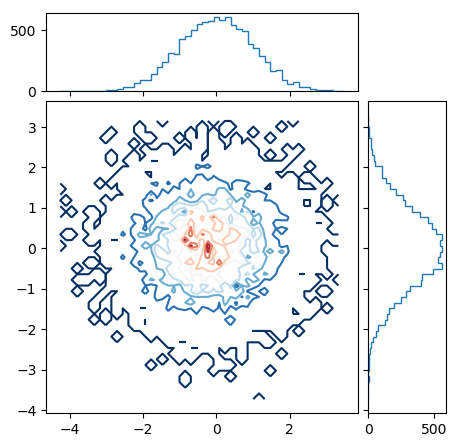

([3.0, 2.0, 2.0, 4.0, 1.0, 6.0, 11.0, 11.0, 17.0, 20.0  …  104.0, 56.0, 44.0, 33.0, 22.0, 22.0, 9.0, 8.0, 1.0, 3.0], [-3.730490775832865, -3.5901475293358764, -3.4498042828388877, -3.309461036341899, -3.1691177898449103, -3.0287745433479216, -2.888431296850933, -2.748088050353944, -2.6077448038569555, -2.467401557359967  …  2.0235823305436718, 2.1639255770406605, 2.304268823537649, 2.444612070034638, 2.5849553165316266, 2.7252985630286153, 2.865641809525604, 3.0059850560225927, 3.1463283025195814, 3.28667154901657], PyObject[PyObject <matplotlib.patches.Polygon object at 0x7f9564dec550>])

In [146]:
using Random
Random.seed!(31435)
N=10000
x=randn(N);y=randn(N);
corner(x,y,50)

In [119]:
include("AMD_stability.jl")

draw_ecc_incl_system_critical_AMD

In [120]:
using Printf

##################################################
#
#     EXAMPLE -- SOLAR SYSTEM
#
##################################################
μ_real = [
	1.66e-7, 2.448e-6, 3e-6, 3.227e-7, # Terrestrial planets.
	9.546e-4, 2.858e-4, 4.366e-5, 5.151e-5 # Jovian planets.
]
a_real = [
	0.387098, 0.723332, 1.00, 1.523679,
	5.2044, 9.5826, 19.2184, 30.11
]
e_real = [
	0.205630, 0.006772, 0.0167086, 0.0934,
	0.0489, 0.0565, 0.046381, 0.009456
]
I_real = [ # Relative to the invariant plane.
	6.34, 2.19, 1.57869, 1.67,
	0.32, 0.93, 1.02, 0.72
] .* π/180
P_real= [87.969257175,224.70,365.25,686.98,4332.82,10755.5, 30687.153,60190.0296]

function report(name,stats,pairs)
	if all(stats .== :Stable)
		@info("$name: AMD stable.")
	else
		@info("$name: AMD unstable")
		for j in 1:length(stats)
			k = pairs[j]
			@info("    Pair ($(k-1),$k) -- $(stats[j])")
		end
	end
	println("")
end

#
# TEST 1
#
stats, pairs, ratios = AMD_stability(μ_real, a_real, e_real, I_real)
report("Solar System", stats, pairs)
#

┌ Info: Solar System: AMD unstable
└ @ Main In[120]:30
┌ Info:     Pair (0,1) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (1,2) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (2,3) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (3,4) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (4,5) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (5,6) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (6,7) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (7,8) -- Stable
└ @ Main In[120]:33


In [121]:
stats, pairs, ratios = AMD_stability(μ_real[1:4], a_real[1:4], e_real[1:4], I_real[1:4])
report("Inner Solar System", stats, pairs)

┌ Info: Inner Solar System: AMD stable.
└ @ Main In[120]:28


In [122]:
stats, pairs, ratios = AMD_stability(μ_real[5:end], a_real[5:end], e_real[5:end], I_real[5:end])
report("Outer Solar System", stats, pairs)

┌ Info: Outer Solar System: AMD stable.
└ @ Main In[120]:28


In [127]:
# Fake Mars
μ = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
P=[224.70077517395697, 365.2564552605551,1733.7614715994966, 4202.849483362612]
a = calc_sma.(P,μ)./CGS.AU
e = [calc_ecc(3.7336627654746756e-5,-0.0003712889341763076), calc_ecc(0.013146866967261101,0.00172740634375595), calc_ecc(0.26126214547436966,0.00860505790153028), calc_ecc(0.013493684234908196,-0.03727854443469793)]
I = [1.5707, 1.5707, 1.5707, 1.5707].* π/180 # assume all co-planar, edge-on orbits relative to the invariant plane.
stats, pairs, ratios = AMD_stability(μ, a, e, I)
report("Fake_Mars - System", stats, pairs)

┌ Info: Fake_Mars - System: AMD unstable
└ @ Main In[120]:30
┌ Info:     Pair (0,1) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (1,2) -- Collision
└ @ Main In[120]:33
┌ Info:     Pair (2,3) -- Stable
└ @ Main In[120]:33
┌ Info:     Pair (3,4) -- Stable
└ @ Main In[120]:33


In [129]:
# Fake Mars
μ = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
P=[224.70077517395697, 365.2564552605551,1733.7614715994966, 4202.849483362612]
a = calc_sma.(P,μ)./CGS.AU
e = [calc_ecc(3.7336627654746756e-5,-0.0003712889341763076), calc_ecc(0.013146866967261101,0.00172740634375595), calc_ecc(0.26126214547436966,0.00860505790153028), calc_ecc(0.013493684234908196,-0.03727854443469793)]
I = [0.0, 0.0, 0.0, 0.0].* π/180 # assume all co-planar, edge-on orbits relative to the invariant plane.
stats, pairs, ratios = AMD_stability(μ[1:2], a[1:2], e[1:2], I[1:2])
report("Fake_Mars - System", stats, pairs)

┌ Info: Fake_Mars - System: AMD stable.
└ @ Main In[120]:28


In [130]:
stats, pairs, ratios = AMD_stability(μ[1:2], a[1:2], e[1:2], I[1:2])
report("Fake_Mars - Inner System", stats, pairs)
stats, pairs, ratios = AMD_stability(μ[3:4], a[3:4], e[3:4], I[3:4])
report("Fake_Mars - Outer System", stats, pairs)

┌ Info: Fake_Mars - Inner System: AMD stable.
└ @ Main In[120]:28
┌ Info: Fake_Mars - Outer System: AMD stable.
└ @ Main In[120]:28


In [54]:
grid_type_nplanet="widep4";sigma=30;nyear=;
mcfile=string("MCMC/",grid_type_nplanet,"_mcmc",sigma,"s",nyear,"yrs.jld2")
m=jldopen(String(mcfile),"r")
par_mcmc= m["par_mcmc"];
lprob_mcmc=m["lprob_mcmc"];
nwalkers=m["nwalkers"];
nsteps=m["nsteps"];
pname=m["pname"];
iburn=m["iburn"];
# indepsamples=m["indepsamples"]

In [97]:
parname=[L"$μ_1$=$m_p/M_{⋆}$",L"$P_1$ [days]",L"$t_{0,1}$",L"$e_1 cos(ω_1)$",L"$e_1 sin(ω_1)$",
    L"$μ_2$=$m_p/M_{⋆}$",L"$P_2$ [days]",L"$t_{0,2}$",L"$e_2 cos(ω_2)$",L"$e_2 sin(ω_2)$",
    L"$μ_4$=$m_p/M_{⋆}$",L"$P_4$ [days]",L"$t_{0,4}$",L"$e_4 cos(ω_4)$",L"$e_4 sin(ω_4)$",
    L"$μ_3$=$m_p/M_{⋆}$",L"$P_3$ [days]",L"$t_{0,3}$",L"$e_3 cos(ω_3)$",L"$e_3 sin(ω_3)$",
#     L"$μ_5$ [$M_{⋆}$]",L"$P_5$ [days]",L"$t_{0,5}$",L"$e_4 cos(ω_5)$",L"$e_5 sin(ω_5)$",
    L"$t_{max} sin(ϕ_0)$",L"$t_{max} cos(ϕ_0)$",L"$Δϕ$ [rad]",L"$σ_{sys}^2$ [days]"]
truem1,truem2,truem3,truem4=0.815.*CGS.MEARTH/CGS.MSUN,1.0.*CGS.MEARTH/CGS.MSUN,0.1074.*CGS.MEARTH/CGS.MSUN,317.8.*CGS.MEARTH/CGS.MSUN
truep1,truep2,truep3,truep4=224.7007992,365.2564,686.9795859,4332.82012875
trueec1,trueec2,trueec3,trueec4=calc_evec1(0.00677323,131.53298),calc_evec1(0.01671022,102.94719),calc_evec1(0.09341233,336.04084),calc_evec1(0.04839266,14.75385)
truees1,truees2,truees3,truees4=calc_evec2(0.00677323,131.53298),calc_evec2(0.01671022,102.94719),calc_evec2(0.09341233,336.04084),calc_evec2(0.04839266,14.75385)
truee1,truee2,truee3,truee4=0.00677323,0.01671022,0.09341233,0.04839266

(0.00677323, 0.01671022, 0.09341233, 0.04839266)

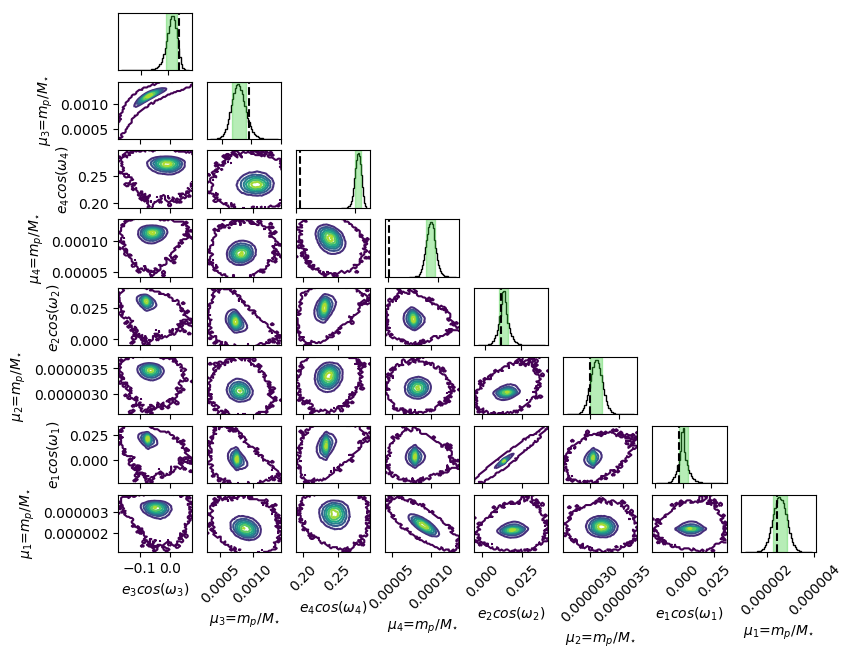

In [100]:
test_values=[ 
    vec(par_mcmc[:,iburn:end,1]), 
    vec(par_mcmc[:,iburn:end,4]),
    vec(par_mcmc[:,iburn:end,6]), 
    vec(par_mcmc[:,iburn:end,9]), 
    vec(par_mcmc[:,iburn:end,11]), 
    vec(par_mcmc[:,iburn:end,14]), 
    vec(par_mcmc[:,iburn:end,16]), 
    vec(par_mcmc[:,iburn:end,19])]
true_vals=[truem1;trueec1;truem2;trueec2;truem3;trueec3;truem4;trueec4]#;truem4;truep4];
labels=[parname[1];
    parname[4];
    parname[6];
    parname[9];
    parname[11];
    parname[14];
    parname[16];
    parname[19]];
include("corner_plot.jl");
# suptitle(string("Eccentricity vectors for ",model,L"; $σ_{obs}=30$-s, $n_{year}=30$"))
# title(string("BIC=-1163.0")) 
corner(test_values,true_vals,labels,50)
# tight_layout()
# savefig("IMAGES/discussion/widep4-30s30yrs_me.png",dpi=200)

In [26]:
nparam=length(par_mcmc[1,end,:]) 
bad_walk=[]
for i in 1:nwalkers
    for j in 1:nparam-1
    walker_med,walker_quant=quantile!(par_mcmc[i,m["iburn"]:end,j],[0.5,0.9])
    walker_prob=median(lprob_mcmc[i,m["iburn"]:end])
        prob_max=maximum(lprob_mcmc[:,m["iburn"]:end])
#     par_med,par_quant=quantile!(par_mcmc[,m["iburn"]:end,],[0.5,0.9])
        if abs(walker_prob-prob_max)>30 || par_mcmc[i,m["iburn"]:end,end] > sigma
#       append!(bad_walk,i,j)
            println(i," ",walker_prob[i])
    end
  end
end

In [3]:
include("MCMC.jl")
med30,err30=mc_vals(30,22,"p3moon",2,true);
med60,err60=mc_vals(60,22,"p3moon",2,true);
med10,err10=mc_vals(10,22,"p3moon",2,true);

┌ Warning: MCMCDiagnostics.jl has been deprecated in favor of MCMCDiagnosticTools.jl.
│ (https://github.com/TuringLang/MCMCDiagnosticTools.jl/) and is no longer
│ maintained.
└ @ MCMCDiagnostics /Users/bethleelindor/.julia/packages/MCMCDiagnostics/uVCwA/src/MCMCDiagnostics.jl:4


Bad walkers: Any[]
Bad walkers: Any[]
Bad walkers: Any[]


In [33]:
colors=["salmon","forestgreen","firebrick"]
labels=["planet b","planet c","planet d","planet e"]
planets=["Venus", "Earth","Mars" ,"Jupiter"] #.*(CGS.MSUN/CGS.MEARTH)
true_Mp=[0.815, 1, 317.8, 0.1074]

function plot_noise(nplanet,param,ylabel,med10::Array{Float64},med30::Array{Float64},med60::Array{Float64},err10::Array{Float64, 2},err30::Array{Float64, 2},err60::Array{Float64, 2},model::LaTeXString,nyear::String)
    #./CGS.MSUN*CGS.MEARTH
    @assert(param<=5)
#     println(size(noise)," ",size(y)," ",size(yerr))
    fig=plt.figure(figsize=(6,4))
    ax1=gca()
    ax2=fig.add_axes([0.51,0.3,0.32,0.3])
    ax1.text(12.5,true_Mp[3]*1.02,string(planets[4]),fontsize="large")
    ax2.text(3,true_Mp[1]*1.03,"V",fontsize="large")
    ax2.text(3,true_Mp[2]*1.03,"E",fontsize="large")
    if nplanet==4
        ax2.text(3,true_Mp[4]*1.5,string(planets[3]),fontsize="large")
    end
#     nplanet=3
    for iplanet=1:nplanet
        par_index=iplanet*5-param
        y=[med10[par_index], med30[par_index], med60[par_index]]
        yerr=[[err10[1,par_index] err30[1,par_index] err60[1,par_index]]
             [err10[2,par_index] err30[2,par_index] err60[2,par_index]]]
            if param==4
                y*=CGS.MSUN/CGS.MEARTH
                yerr*=CGS.MSUN/CGS.MEARTH
        end
    ax1.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--")
    ax2.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--")
    ax1.errorbar(noise,y,yerr=yerr,fmt=".",capsize=4,color=colors[iplanet],ms=5,label=labels[iplanet])
    ax2.errorbar(noise,y,yerr=yerr,fmt=".",capsize=4,color=colors[iplanet],ms=10)
    ax1.fill_between(noise,y.-yerr[1,:] ,y.+yerr[2,:],alpha=0.12,color="limegreen")
    ax2.fill_between(noise,y.-yerr[1,:] ,y.+yerr[2,:],alpha=0.12,color="limegreen")
    end
# ax1.plot([10,30,60],[med10[11],med30[11],med60[11]].*CGS.MSUN/CGS.MEARTH)
ax2.set_ylim(0,1.3)
ax2.set_xlim(0,68)
ax1.minorticks_on()
# ax2.tick_params(which="both",direction="in",right=true,top=true)
ax2.minorticks_on()
ax2.tick_params(which="both",direction="in",top=true,labelbottom=false)
ax1.set_title(string(nyear," model: ",model),fontsize="x-large")
ax1.set_ylabel(string(ylabel),fontsize="large")
ax1.set_xlabel(L"Injected Noise, $\sigma_{obs}$ (seconds)",fontsize="large")
ax1.legend()
# ax2.set_ylabel(L"$M_p$",fontsize="medium")
# ax2.set_xlabel(L"$\sigma_{obs}$",fontsize="medium")
#     plt.show()
end


#plot_noise(3,4,L"Retrieved Planet Masses, [$M_{\oplus}$]",med10,med30,med60,err10,err30,err60,L"$\mathcal{H}_{PPsP}$","[22 yr span]")

plot_noise (generic function with 1 method)

In [220]:
# plot_noise(3,3,L"Period [days]",med10,med30,med60,err10,err30,err60,L"$\mathcal{H}_{PPsP}$","[22 yr span]")

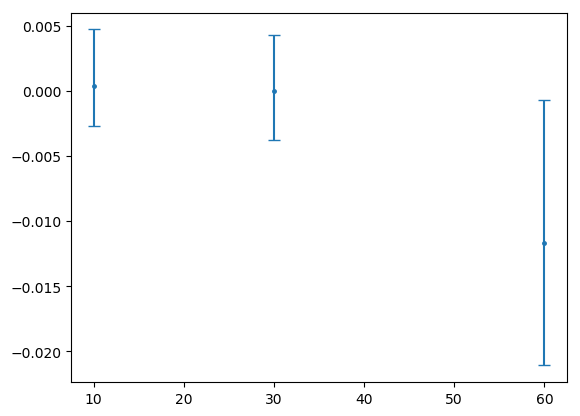

(PyObject <matplotlib.lines.Line2D object at 0x7fceed94d550>, (PyObject <matplotlib.lines.Line2D object at 0x7fceed94dc18>, PyObject <matplotlib.lines.Line2D object at 0x7fceed94dcc0>), (PyObject <matplotlib.collections.LineCollection object at 0x7fceed93ee80>,))

In [271]:
   noise=[10, 30 ,60]
function plot_noise(nplanet,par_index,ylabel,med10::Array{Float64},med30::Array{Float64},med60::Array{Float64},err10::Array{Float64, 2},err30::Array{Float64, 2},err60::Array{Float64, 2},model::LaTeXString,nyear::String)
    #./CGS.MSUN*CGS.MEARTH
    fig=plt.figure()
        ax1=gca()
        y=[med10[par_index], med30[par_index], med60[par_index]]
        yerr=[[err10[1,par_index] err30[1,par_index] err60[1,par_index]]
             [err10[2,par_index] err30[2,par_index] err60[2,par_index]]]
    ax1.errorbar(noise,y,yerr=yerr,fmt=".",capsize=4,ms=5)
#     ax2.errorbar(noise,y,yerr=yerr,fmt=".",capsize=4,ms=10)
#     ax1.fill_between(noise,y.-yerr[1,:] ,y.+yerr[2,:],alpha=0.12,color="limegreen")
#     ax2.fill_between(noise,y.-yerr[1,:] ,y.+yerr[2,:],alpha=0.12,color="limegreen")
    end



In [28]:
medp30,errp30=mc_vals(30,30,"widep4",2);
medp60,errp60=mc_vals(60,30,"widep4",2);
# medp10,errp10=mc_vals(10,30,"widep4",2);
# include("corner_plot.jl")
# corner_plot(10,30,"widep4",2,75)

Bad walkers: Any[]
Bad walkers: Any[]


In [29]:
for i=1:3
#     println(" +",err30[2,i*5-4]/med30[i*5-4]," -",err30[1,i*5-4]/med30[i*5-4])
#     println(" +",err60[2,i*5-4]/med60[i*5-4]," -",err60[1,i*5-4]/med60[i*5-4])
    println(" +",errp30[2,i*5-4]/medp30[i*5-4]," -",errp30[1,i*5-4]/medp30[i*5-4])
    println(" +",errp60[2,i*5-4]/medp60[i*5-4]," -",errp60[1,i*5-4]/medp60[i*5-4])
    #,med30[i*5-4].*CGS.MSUN/CGS.MEARTH," ", err30[i*5-4].*CGS.MSUN/CGS.MEARTH)#," ",err30[i*5-4]/med30[i*5-4])
    #println("[60-yr span]",med60[i*5-4].*CGS.MSUN/CGS.MEARTH," ", err60[i*5-4].*CGS.MSUN/CGS.MEARTH)#" ",(med60[i*5-4]-err60[i*5-4])/med60[i*5-4])
    
end

 +0.11544455052728685 -0.11524013188768009
 +0.23917433495626542 -0.2351822086132572
 +0.03335776104298463 -0.03317294696024135
 +0.07220007605342212 -0.07129087562357775
 +0.1084093940747599 -0.10626812356500509
 +0.22834262165896 -0.23187327914618522


In [252]:
corner_plot(60,22,"widep3moonp4",2,75,true)

BIC= -715.7	 reduced χ^2: 167.0


In [248]:
corner_plot(30,30,"p3moonp4",2,75,true)

BIC= -927.3	 reduced χ^2: 1.013


In [253]:
corner_plot(60,22,"p2",2,75)

BIC= -646.9	 reduced χ^2: 1.429


LoadError: BoundsError: attempt to access 75×10000×11 Array{Float64, 3} at index [1, 1981:10000, 12]

In [32]:
include("MCMC.jl")
medpm10,errpm10=mc_vals(10,30,"p3moonp4",2,true);
medpm30,errpm30=mc_vals(30,30,"p3moonp4",2,true);
medpm60,errpm60=mc_vals(60,30,"widep3moonp4",2,true);
#plot_noise(4,4,"Retrieved Phase Offset",medp10,medp30,medpm60,errp10,errp30,errpm60,L"$\mathcal{H}_{PPPP}$","[30 yr span]")



LoadError: UndefVarError: plot_noise not defined

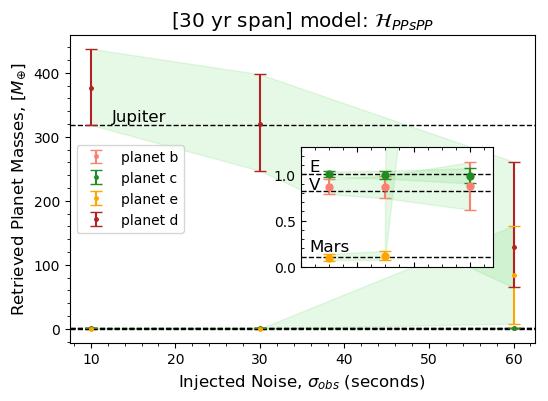

PyObject <matplotlib.legend.Legend object at 0x7fcb7127eb00>

In [37]:
labels=["planet b","planet c","planet e","planet d"]
planets=["Venus", "Earth","Mars","Jupiter"]
colors=["salmon","forestgreen","orange","firebrick"]
true_Mp=[0.815, 1, 317.8,0.1074]
   noise=[10, 30 ,60]
plot_noise(4,4,L"Retrieved Planet Masses, [$M_{\oplus}$]",medpm10,medpm30,medpm60,errpm10,errpm30,errpm60,L"$\mathcal{H}_{PPsPP}$","[30 yr span]")



In [265]:
labels=["planet b","planet c","planet e","planet d"]
planets=["Venus", "Earth","Mars","Jupiter"]
colors=["salmon","forestgreen","orange","firebrick"]
true_Mp=[0.815, 1, 317.8,0.1074]
param=4
plot_noise(2,param,"Retrieved Ecc",medp10,medp30,medp60,errp10,errp30,errp60,L"$\mathcal{H}_{PPPP}$","[30 yr span]")
# ax3=fig.add_axes([0.51,0.7,0.32,0.2])
# ax3.plot()
# ax3.tick_params(bottom=false,labelbottom=false)

# ax3.set_ylim(.5,50)

Figure(PyObject <Figure size 900x600 with 2 Axes>)

PyObject <matplotlib.legend.Legend object at 0x7fce872e74a8>

In [ ]:
function plot_noise()
    true_Mp=[0.815, 1, 317.8, 0.1074]
#     noise=[10,30,60]
    nplanet=3
    fig=plt.figure(figsize=(6,4))
    ax1=gca()
    ax2=fig.add_axes([0.51,0.2,0.32,0.4])
    ax1.text(15,true_Mp[3]*1.05,string(planets[3]),fontsize="medium")
    ax2.text(15,true_Mp[1]*1.05,string(planets[1]),fontsize="medium")
    ax2.text(15,true_Mp[2]*1.05,string(planets[2]),fontsize="medium")
    for iplanet=1:nplanet
#     ax.text(15,true_val[iplanet]+0.01,string(planets[iplanet]),fontsize="medium")
    ax1.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--",label=planets[iplanet])
    ax1.errorbar(60,med60[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err60[1,iplanet*5-4] err60[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    ax1.errorbar(30,med30[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err30[1,iplanet*5-4] err30[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    ax1.errorbar(10,med10[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err10[1,iplanet*5-4] err10[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",color=colors[iplanet])
    
    ax2.axhline(true_Mp[iplanet],linewidth=1.0,color="black",linestyle="--",label=planets[iplanet])
    ax2.errorbar(60,med60[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err60[1,iplanet*5-4] err60[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    ax2.errorbar(30,med30[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err30[1,iplanet*5-4] err30[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    ax2.errorbar(10,med10[iplanet*5-4].*CGS.MSUN/CGS.MEARTH,yerr=[err10[1,iplanet*5-4] err10[2,iplanet*5-4]]
            .*CGS.MSUN/CGS.MEARTH,fmt=".",ms=10,color=colors[iplanet])
    end
        # #             scatter(noise[j],med[iplanet],color=colors[iplanet])
    #         end
# ax1.plot([10,30,60],[med10[11],med30[11],med60[11]].*CGS.MSUN/CGS.MEARTH)
ax2.set_ylim(0,1.3)
ax1.minorticks_on()
# ax2.tick_params(which="both",direction="in",right=true,top=true)
ax2.minorticks_on()
ax2.tick_params(which="both",direction="in",right=true,top=true)
model=L"$\mathcal{H}_{PPsP}$"
ax1.set_title(string("Parameters from [22 yr span], most preferred model: ",model))
ax1.set_ylabel(L"Retrieved Planet Masses, [$M_{\oplus}$]",fontsize="large")
ax1.set_xlabel(L"Injected Noise, $\sigma_{obs}$ (seconds)",fontsize="large")
# plt.legend()
# ax2.set_ylabel(L"$M_p$, [$M_{\oplus}$]",fontsize="large")
# ax2.set_xlabel(L"Injected Noise, $\sigma_{obs}$",fontsize="large")
end

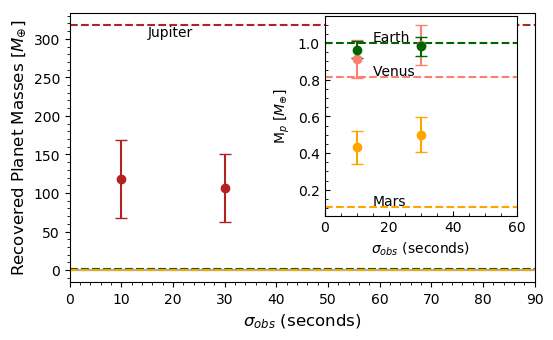

PyObject Text(0.5, 99.7611111111111, '$\\sigma_{obs}$ (seconds)')

In [259]:
fig=plt.figure(figsize=(6,3.5))
# plot_noise(true_Mp,Mp,Mp_err)
errorbar(noise[1],Mp[4,1],Mp_err[4,1],fmt="o",capsize=4,color=colors[4])
errorbar(noise[2],Mp[4,2],Mp_err[4,2],fmt="o",capsize=4,color=colors[4])
text(15,true_Mp[4]-15,string(planets[4]),fontsize="medium")
# axhline(true_Mp[4],linestyle="--",color=colors[4])
for iplanet=1:4
        axhline(true_Mp[iplanet],linestyle="--",color=colors[iplanet])
end
axhspan(0,1.2,color="grey",alpha=0.5)
xlim(0,90)
minorticks_on()
ylabel(L"Recovered Planet Masses [$M_{\oplus}$]",fontsize="large")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="large")
ax2=fig.add_axes([0.55,0.3,0.32,0.57])
plot_noise(true_Mp,Mp,Mp_err)
ax2.set_xlim(0,60)
# ax2.set_ylim()
ax2.tick_params(which="both",direction="in",right=false,top=false)
minorticks_on()
ylabel(L"M$_p$ [$M_{\oplus}$]",fontsize="medium")
xlabel(L"$\sigma_{obs}$ (seconds)",fontsize="medium")

### Results

In [5]:

function span_vs_mass(fmt,less20::Bool=false)
    function plot_span(iplanet,color,fmt::String,less20::Bool)
        errorbar(30,M30yr[iplanet],M30yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(25,M25yr[iplanet],M25yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(20,M20yr[iplanet],M20yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        if less20
            errorbar(15,M15yr[iplanet],M15yr_er[iplanet],fmt=fmt,color=color,capsize=4)
        end
        xlim(0,40)
        xlabel("Observation Time Span (yrs)")
        minorticks_on()
        
    end
end
function noise_vs_mass(fmt,g90::Bool=false)
    function plot_noise(iplanet,color,fmt::String,g90::Bool)
        axhline(vals[iplanet],linestyle="--",color="black")
        errorbar(10,M10sec[iplanet],M10sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(30,M30sec[iplanet],M30sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        errorbar(60,M60sec[iplanet],M60sec_er[iplanet],fmt=fmt,color=color,capsize=4)
        if g90
            errorbar(90,M90sec[iplanet],M90sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            errorbar(120,M120sec[iplanet],M120sec_er[iplanet],fmt=fmt,color=color,capsize=4)
            ylim(0,M120sec[iplanet]*2)
        end
        xlim(0,180)
        xlabel(L"$\sigma_{ij}$ (seconds)")
        minorticks_on()
        tick_params(which="both",direction="in",right="true",top="true")
    end
    fig=figure(figsize=(8,6))
    if length(M10sec) > 3
        ax1=subplot(141)
    else
        ax1=subplot(131)
    end
    axhline(vals[1],linestyle="--",color="black")
    plot_noise(1,"orange",fmt,g90)
    ax1.set_ylabel(L"Recovered Planet 1 Mass [$M_{Earth}$]")
    ax1.text(120,0.84,"Venus")
    ax1.set_ylim(0,1.8)
    if length(M10sec) > 3
        ax2=subplot(142)
    else
        ax2=subplot(132)
    end
    axhline(vals[2],linestyle="--",color="black")
    plot_noise(2,"green",fmt,g90)
    ax2.set_ylabel(L"Recovered Planet 2 Mass [$M_{Earth}$]")
    ax2.text(120,1.02,"Earth")
    ax2.set_ylim(0,1.2)
    if length(M10sec) > 3
        ax3=subplot(143)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(4,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
        ax4=subplot(144)
        axhline(vals[3],linestyle="--",color="black")
        plot_noise(3,"darkcyan",fmt,g90)
        ax4.set_ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
        ax4.text(120,2,"Mars")
        ax4.set_ylim(0,50)
    else
        ax3=subplot(133)
        axhline(vals[4],linestyle="--",color="black")
        plot_noise(3,"firebrick",fmt,g90)
        ax3.set_ylabel(L"Recovered Planet 3 Mass [$M_{Earth}$]")
        ax3.text(120,300,"Jupiter")
        ax3.set_ylim(0,350)
    end
    tight_layout()
end

noise_vs_mass (generic function with 2 methods)

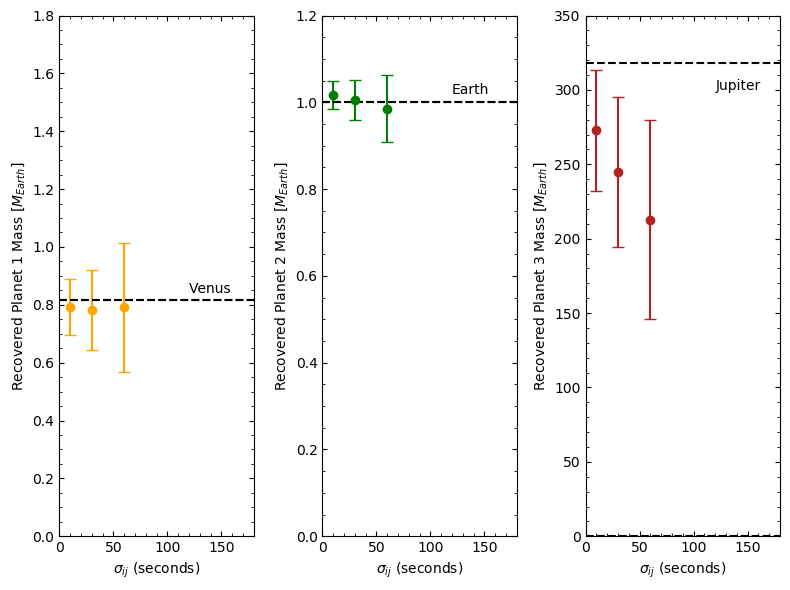

In [29]:
M10, M10_er = get_vals(10.0,30.0,"noEMB","p4")
M30, M30_er = get_vals(30.0,30.0,"noEMB","p4")
M60, M60_er = get_vals(60.0,30.0,"noEMB","p4")
noise_vs_mass("o")

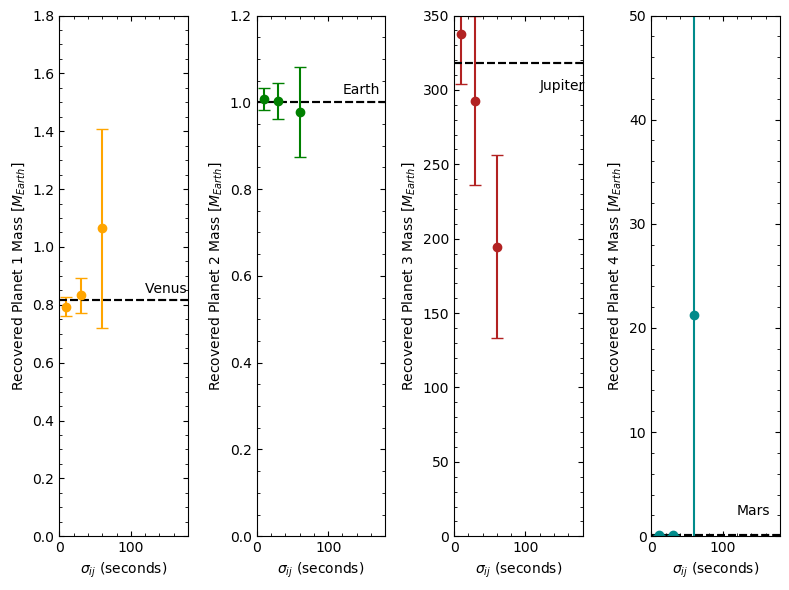

In [42]:
M10, M10_er = get_vals(10.0,30.0,"EMB","p4")
M30, M30_er = get_vals(30.0,30.0,"EMB","p4")
M60, M60_er = get_vals(60.0,30.0,"EMB","p4")
noise_vs_mass("o")

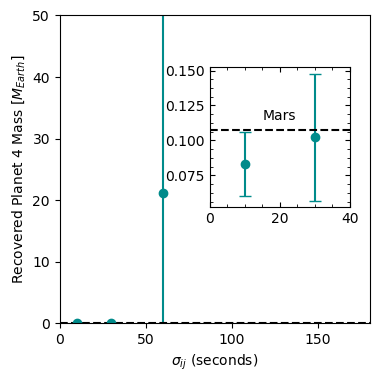

In [50]:
fig=figure(figsize=(4,4))
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlabel(L"$\sigma_{ij}$ (seconds)")
xlim(0,180)
ylim(0,50)
ax2 = fig.add_axes([0.5,0.4,0.35,0.35])
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
ax2.text(15,0.115,"Mars")
minorticks_on()
xlim(0,40)
tick_params(which="both",direction="in",right="true",top="true")

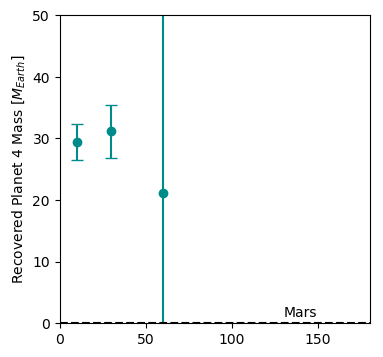

(0, 50)

In [129]:
M10, M10_er = get_vals(10.0,30.0,"noEMB","p4")
M30, M30_er = get_vals(30.0,30.0,"noEMB","p4")
M60, M60_er = get_vals(60.0,30.0,"noEMB","p4")
fig=figure(figsize=(4,4))
errorbar(10,M10[3],M10_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(30,M30[3],M30_er[3],fmt="o",color="darkcyan",capsize=4)
errorbar(60,M60[3],M60_er[3],fmt="o",color="darkcyan",capsize=4)
axhline(vals[3],linestyle="--",color="black")
text(130,1,"Mars")
ylabel(L"Recovered Planet 4 Mass [$M_{Earth}$]")
xlim(0,180)
ylim(0,50)

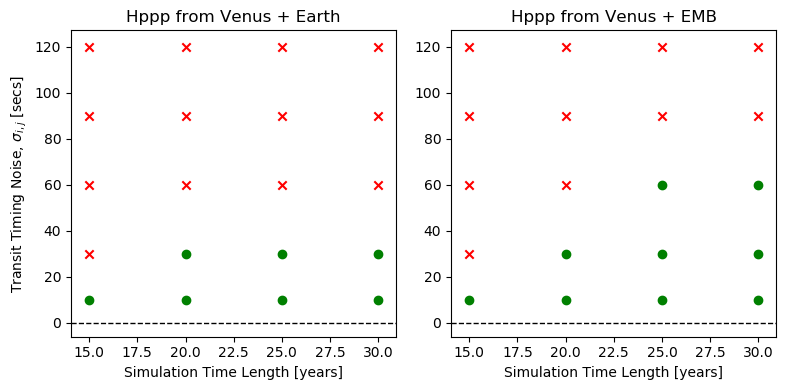

In [20]:
figure(figsize=(8,4)) 
# suptitle("Giant Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(20,10,marker="o",color="green")
ax1.scatter(25,10,marker="o",color="green")
ax1.scatter(30,10,marker="o",color="green")
ax1.scatter(15,30,marker="x",color="red")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(20,30,marker="o",color="green")
ax1.scatter(25,30,marker="o",color="green")
ax1.scatter(30,30,marker="o",color="green")
ax1.scatter(15,60,marker="x",color="red")
ax1.scatter(20,60,marker="x",color="red")
ax1.scatter(25,60,marker="x",color="red")
ax1.scatter(30,60,marker="x",color="red")
ax1.scatter(15,90,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(20,90,marker="x",color="red")
ax1.scatter(25,90,marker="x",color="red")
ax1.scatter(30,90,marker="x",color="red")
ax1.scatter(15,120,marker="x",color="red")
ax1.scatter(20,120,marker="x",color="red")
ax1.scatter(25,120,marker="x",color="red")
ax1.scatter(30,120,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_xlabel("Simulation Time Length [years]")
# ax1.text(.5,5.5,"a)")
ax1.set_title("Hppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(15,10,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(20,10,marker="o",color="green")
ax2.scatter(25,10,marker="o",color="green")
ax2.scatter(30,10,marker="o",color="green")
ax2.scatter(15,30,marker="x",color="red")
ax2.scatter(20,30,marker="o",color="green")
ax2.scatter(25,30,marker="o",color="green")
ax2.scatter(30,30,marker="o",color="green")
ax2.scatter(15,60,marker="x",color="red")
ax2.scatter(20,60,marker="x",color="red")
ax2.scatter(25,60,marker="o",color="green")
ax2.scatter(30,60,marker="o",color="green")
ax2.scatter(15,90,marker="x",color="red")
ax2.scatter(20,90,marker="x",color="red")
ax2.scatter(25,90,marker="x",color="red")
ax2.scatter(30,90,marker="x",color="red")
ax2.scatter(15,120,marker="x",color="red")
ax2.scatter(20,120,marker="x",color="red")
ax2.scatter(25,120,marker="x",color="red")
ax2.scatter(30,120,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
# ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_title("Hppp from Venus + EMB")
tight_layout()
show()
# make yaxis evenly spaced... dashed line at 0

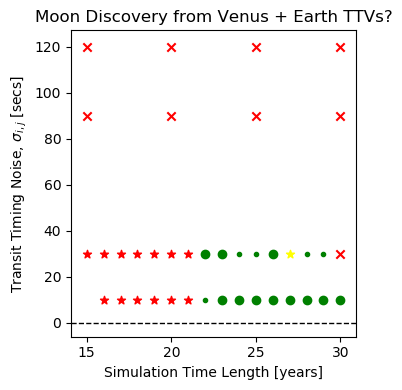

In [273]:
fig=figure(figsize=(4,4)) #Moon detections from EV times
ax3=gca()
# ax3.scatter(15,10,marker="o",color="green")#,label=L"$\geq3\sigma$ EMB Detection")
ax3.scatter(15,10,marker="x",color="red")
ax3.scatter(16,10,marker="*",color="red")
ax3.scatter(17,10,marker="*",color="red")
ax3.scatter(18,10,marker="*",color="red")
ax3.scatter(19,10,marker="*",color="red")
ax3.scatter(20,10,marker="*",color="red")
ax3.scatter(21,10,marker="*",color="red")
ax3.scatter(22,10,marker=".",color="green")
ax3.scatter(23,10,marker="o",color="green")
ax3.scatter(24,10,marker="o",color="green")
ax3.scatter(25,10,marker="o",color="green")
ax3.scatter(26,10,marker="o",color="green")
ax3.scatter(27,10,marker="o",color="green")
ax3.scatter(28,10,marker="o",color="green")
ax3.scatter(29,10,marker="o",color="green")
ax3.scatter(30,10,marker="o",color="green")
#### 30 secs
ax3.scatter(15,30,marker="*",color="red")
ax3.scatter(16,30,marker="*",color="red")
ax3.scatter(17,30,marker="*",color="red")
ax3.scatter(18,30,marker="*",color="red")
ax3.scatter(19,30,marker="*",color="red")
ax3.scatter(20,30,marker="*",color="red")
ax3.scatter(21,30,marker="*",color="red")
ax3.scatter(22,30,marker="o",color="green")
ax3.scatter(23,30,marker="o",color="green")
ax3.scatter(24,30,marker=".",color="green")
ax3.scatter(25,30,marker=".",color="green")
ax3.scatter(26,30,marker="o",color="green")
ax3.scatter(27,30,marker="*",color="yellow")
ax3.scatter(28,30,marker=".",color="green")
ax3.scatter(29,30,marker=".",color="green")
ax3.scatter(30,30,marker="x",color="red")
##### 60 secs
# ax3.scatter(15,60,marker="x",color="red")
# ax3.scatter(16,60,marker="x",color="red")
# ax3.scatter(17,60,marker="x",color="red")
# ax3.scatter(18,60,marker="x",color="red")
# ax3.scatter(19,60,marker="x",color="red")
# ax3.scatter(20,60,marker="x",color="red")
# ax3.scatter(21,60,marker="x",color="red")
ax3.scatter(22,60,marker=".",color="green")
ax3.scatter(23,60,marker=".",color="green")
ax3.scatter(24,60,marker=".",color="green")
# ax3.scatter(25,60,marker="o",color="green")
# ax3.scatter(26,60,marker="o",color="green")
# ax3.scatter(27,60,marker="o",color="green")
ax3.scatter(28,60,marker="o",color="green")
ax3.scatter(29,60,marker="o",color="green")
ax3.scatter(30,60,marker="x",color="red")
###### 90 secs
ax3.scatter(15,90,marker="x",color="red")
ax3.scatter(20,90,marker="x",color="red")
ax3.scatter(25,90,marker="x",color="red")
ax3.scatter(30,90,marker="x",color="red")
ax3.scatter(15,120,marker="x",color="red")
ax3.scatter(20,120,marker="x",color="red")
ax3.scatter(25,120,marker="x",color="red")
ax3.scatter(30,120,marker="x",color="red")
ax3.axhline(0,linestyle="--",color="black",linewidth=1)
# ax1.scatter(1.25,5,marker="+",label="Additional",color="red")
ax3.set_xlabel("Simulation Time Length [years]")
ax3.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
# ax2.text(.5,5.5,"b)")
ax3.set_title("Moon Discovery from Venus + Earth TTVs?")
tight_layout()
show()

In [ ]:
figure(figsize=(8,4)) 
title("Terrestrial Planet Search Results")
ax1=subplot(121) # from no EMB
ax1.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ Detection")
# ax1.scatter(1+0.1,1,marker="o",color="green")
ax1.scatter(2,1,marker="o",color="green")
ax1.scatter(3,1,marker="o",color="green")
ax1.scatter(4,1,marker="o",color="green")
ax1.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax1.scatter(2,2,marker="o",color="green")
ax1.scatter(3,2,marker="o",color="green")
ax1.scatter(4,2,marker="o",color="green")
ax1.scatter(1,3,marker="o",color="green")
ax1.scatter(2,3,marker="o",color="green")
ax1.scatter(3,3,marker="o",color="green")
ax1.scatter(4,3,marker="x",color="red")
ax1.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax1.scatter(2,4,marker="x",color="red")
ax1.scatter(3,4,marker="x",color="red")
ax1.scatter(4,4,marker="x",color="red")
ax1.scatter(1,5,marker="x",color="red")
ax1.scatter(2,5,marker="x",color="red")
ax1.scatter(3,5,marker="x",color="red")
ax1.scatter(4,5,marker="x",color="red")
ax1.axhline(0,linestyle="--",color="black",linewidth=1)
ax1.set_xlabel("Simulation Time Length [years]")
ax1.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax1.set_title("Hpppp from Venus + Earth")
ax2=subplot(122)
ax2.scatter(1,1,marker="o",color="green",label=L"$\geq3\sigma$ EMB Detection")
ax2.scatter(2,1,marker="o",color="green")
ax2.scatter(3,1,marker="o",color="green")
ax2.scatter(4,1,marker="o",color="green")
ax2.scatter(1,2,marker="o",color="green")#,label=L"$< 3\sigma$ Detection")
ax2.scatter(2,2,marker="o",color="green")
ax2.scatter(3,2,marker="o",color="green")
ax2.scatter(4,2,marker="o",color="green")
ax2.scatter(1,3,marker="o",color="green")
ax2.scatter(2,3,marker="x",color="red")
ax2.scatter(3,3,marker="o",color="green")
ax2.scatter(4,3,marker="x",color="red")
ax2.scatter(1,4,marker="x",color="red")#label="No detection/ not enough steps"
ax2.scatter(2,4,marker="x",color="red")
ax2.scatter(3,4,marker="x",color="red")
ax2.scatter(4,4,marker="x",color="red")
ax2.scatter(1,5,marker="x",color="red")
ax2.scatter(2,5,marker="x",color="red")
ax2.scatter(3,5,marker="x",color="red")
ax2.scatter(4,5,marker="x",color="red")
ax2.axhline(0,linestyle="--",color="black",linewidth=1)
ax2.set_xlabel("Simulation Time Length [years]")
ax2.set_ylabel(L"Transit Timing Noise, $σ_{i,j}$ [secs]")
ax2.set_title("Hppp from Venus + EMB")
# ax1.legend()
tight_layout()
show()

Loading...MCMC/p4_mcmc10.0s30.0yrs.jld2 and FITS/p4_fit10.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc10.0s25.0yrs.jld2 and FITS/p4_fit10.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 10.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc10.0s15.0yrs.jld2 and FITS/p4_fit10.0s15.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s30.0yrs.jld2 and FITS/p4_fit30.0s30.0yrs.jld2
Loading...MCMC/p4_mcmc30.0s25.0yrs.jld2 and FITS/p4_fit30.0s25.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 30.0 secs and 15.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s30.0yrs.jld2 and FITS/p4_fit60.0s30.0yrs.jld2
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 60.0 secs and 20.0 yrs doesn't exist!!!!
Loading...MCMC/p4_mcmc60.0s15.0yrs.jld2 and FITS/p4_fit60.0s15.0yrs.jld2
MCMC or FITS file for 

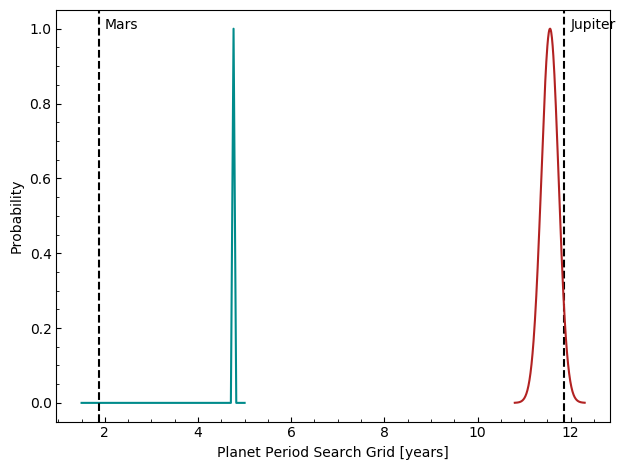

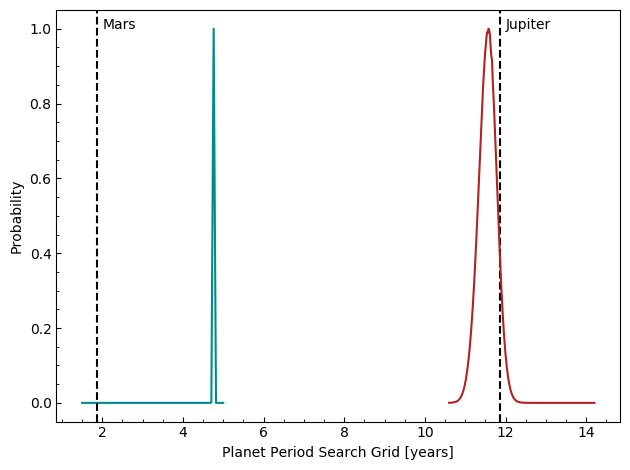

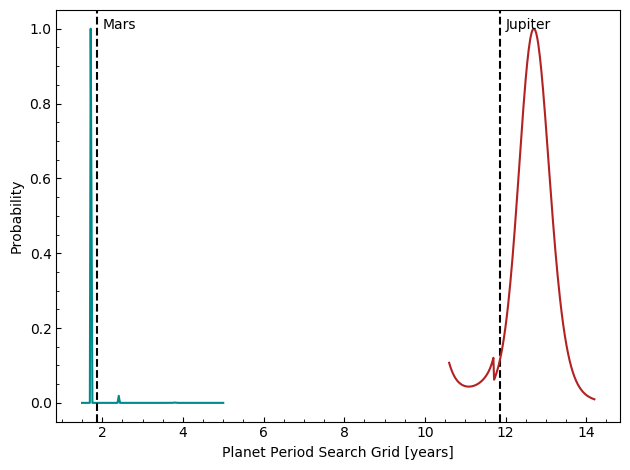

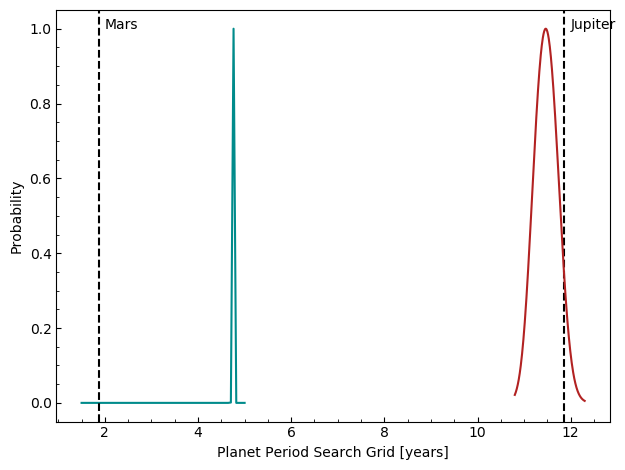

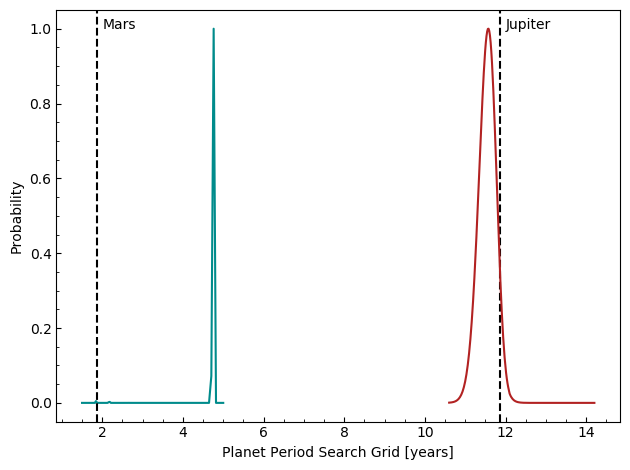

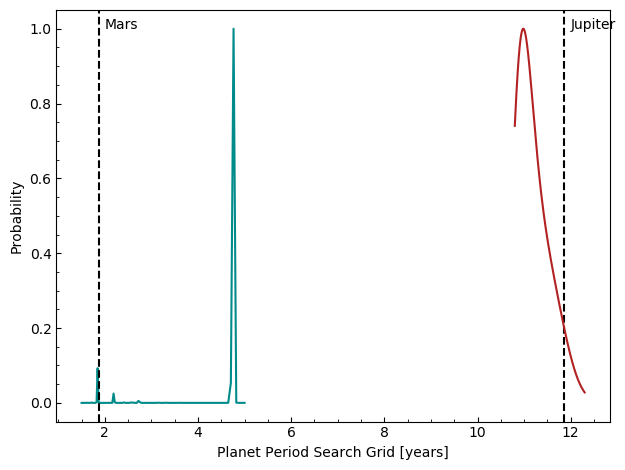

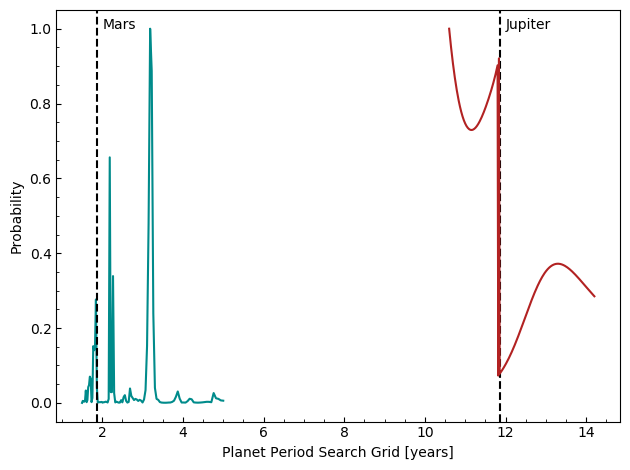

noEMB with p4 model at 90.0 secs and 30.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 25.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 20.0 yrs doesn't exist!!!!
MCMC or FITS file for noEMB with p4 model at 90.0 secs and 15.0 yrs doesn't exist!!!!


In [199]:
# include("plot_emcee.jl")
# include("corner_plot.jl")
include("plot_likelihood.jl")
# include("plot_ttvs.jl")
sigs=[10.0,30.0,60.0,90.0]#,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# plot_emcee(sigs[i],years[j],"noEMB","moon",true)
# corner_plot(sigs[i],years[j],"noEMB","moon",50,true) #still need to run moon true
plot_likelihood(sigs[i],years[j],"noEMB","p4","p4",50) 
# plot_ttvs(sigs[i],years[i],"EMB","p3",false) 
    end
end

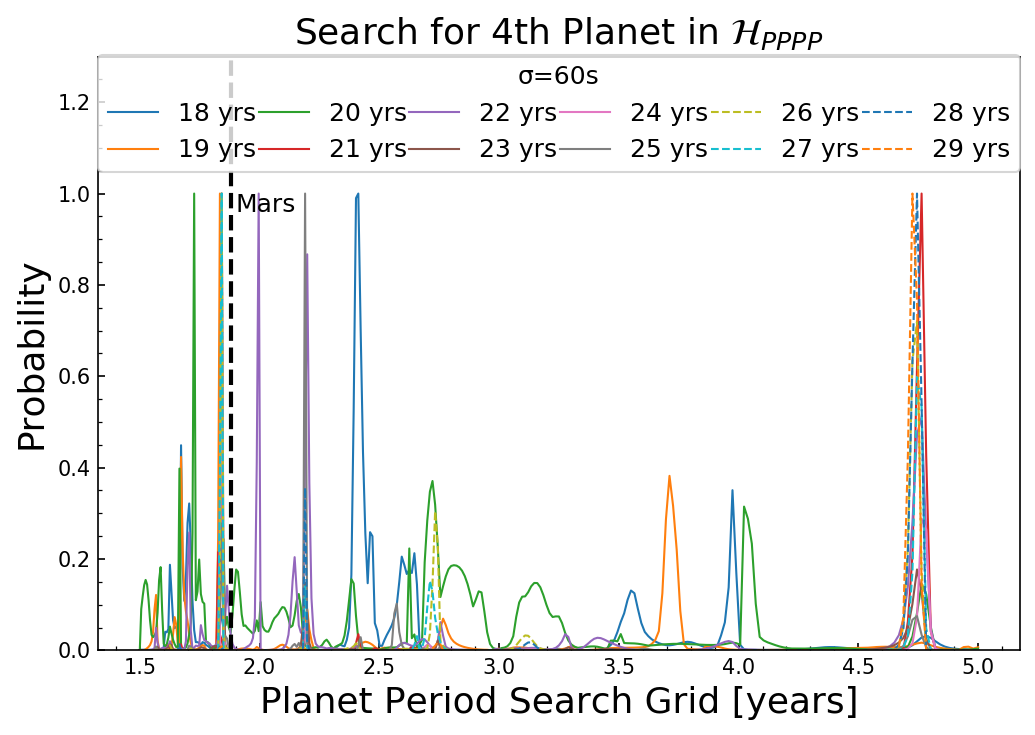

In [135]:
include("plot_likelihood.jl")
compare_yrs(60,"widep4",2)

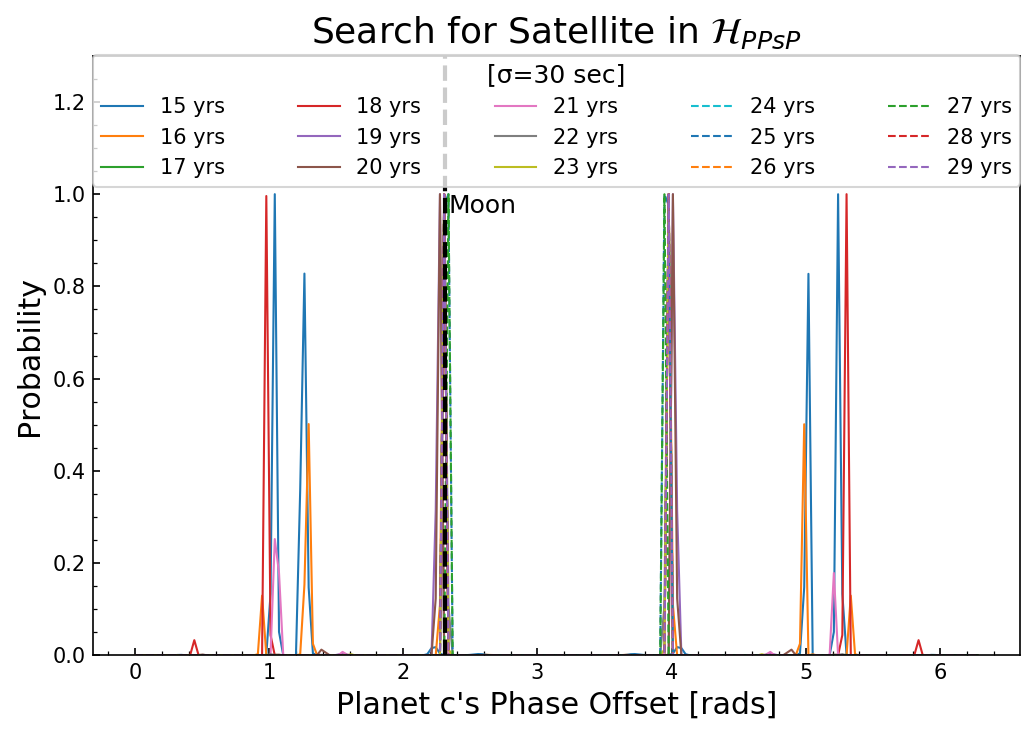

In [10]:
include("plot_likelihood.jl")
moon_yrs(30,"widep3moon",18, 2.312, "Moon",2)

In [3]:
methods(corner_plot)

# 2 methods for generic function "corner_plot":
[1] corner_plot(sigma, nyear, grid_type_nplanet, case_num, nbins) in Main at /Users/bethleelindor/work/washington/ttvs/ttv_ss/corner_plot.jl:697
[2] corner_plot(sigma, nyear, grid_type_nplanet, case_num, nbins, include_moon::Bool) in Main at /Users/bethleelindor/work/washington/ttvs/ttv_ss/corner_plot.jl:697

In [41]:
# include("corner_plot.jl");corner_plot(60,30,"widep3moonp4",2,75,true)
# #corner_plot(60,22,"p3",2,75)

Burn-in number: 40000 out of 40000 steps
BIC= -984.0	 reduced χ^2: 1.789


In [13]:
corner_plot(10,22,"p4",2,75)

# of independent samples: 608.7815944459264
Burn-in number: 25097 out of 40000 steps
BIC= -559.5	 reduced χ^2: 1.35


In [39]:
corner_plot(60,30,"widep4",2,75)

Burn-in number: 5480 out of 40000 steps
BIC= -1028.0	 reduced χ^2: 1.087


In [15]:
corner_plot(60,22,"widep4",2,75)

# of independent samples: 400.6915385966744
Burn-in number: 40000 out of 40000 steps
BIC= -732.2	 reduced χ^2: 44750.0


### Linear Fit to Posterior mean and/or std

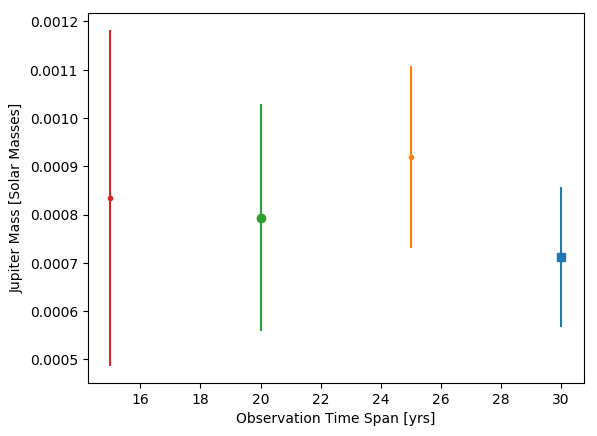

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

In [105]:
using Random
rng = MersenneTwister(1234)
x=range(0,8,length=16)
collect(x)

16-element Array{Float64,1}:
 0.0               
 0.5333333333333333
 1.0666666666666667
 1.6               
 2.1333333333333333
 2.6666666666666665
 3.2               
 3.7333333333333334
 4.266666666666667 
 4.8               
 5.333333333333333 
 5.866666666666666 
 6.4               
 6.933333333333334 
 7.466666666666667 
 8.0               

In [108]:
y1(x) = 3 .+ 4 .* x./8 .+ rand(rng,Float64, length(x))
y2(x) = 1 .+ 2 .* x./8 .+ rand(rng,Float64, length(x))

y2 (generic function with 1 method)

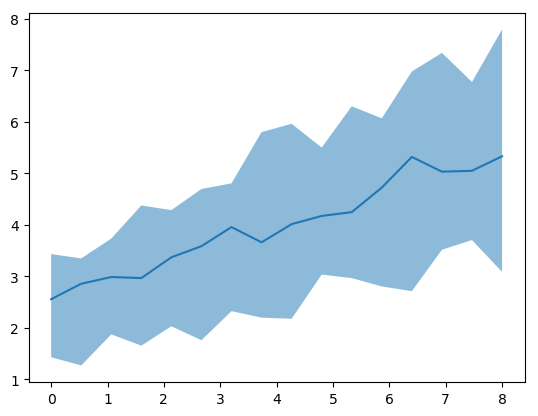

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x153fa7198>

In [109]:
fig,ax=subplots()
ax.fill_between(x, y1(x), y2(x), alpha=.5, linewidth=0)
plot(x,(y1(x) + y2(x))/2)